In [1]:
from recast.CPT import CPT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

# Croatian site 

In [2]:
# Sibenik
layout = CPT()
layout.MESH_EXTENT = 3500
layout.AVERAGE_RANGE = 4000
layout.LANDCOVER_DATA_PATH = '/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/input/landcover/g100_clc12_V18_5.tif'
layout.OUTPUT_DATA_PATH = '/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/output/'
layout.set_utm_zone('33T')
layout.MAX_ELEVATION_ANGLE = 7

points = np.array([
[576697.34, 4845753, 395 + 80],
[576968, 4845595, 439 + 80],
[577215, 4845425, 423 + 80],
[577439, 4845219, 430 + 80],
[577752, 4845005, 446 + 80],
[577979, 4844819, 478 + 80],
[578400, 4844449, 453 + 80],
[578658, 4844287, 450 + 80],
[578838, 4844034, 430 + 80],
[578974, 4843842, 417 + 80],
[579121, 4844186, 413 + 80],
[579246, 4843915, 410 + 80]
])

layout.add_measurement_instances(points = points, points_type = 'misc')
layout.generate_mesh()
layout.optimize_measurements()

Correct latitudinal zone!
Correct longitudinal zone!
UTM zone set
Measurement points 'misc' added to the measurements dictionary!
Measurements dictionary contains 1 different measurement type(s).
Correct latitudinal zone!
Correct longitudinal zone!
Optimizing misc measurement points!
Correct latitudinal zone!
Correct longitudinal zone!
Measurement points 'optimized' added to the measurements dictionary!
Measurements dictionary contains 2 different measurement type(s).


In [3]:
layout.generate_combined_layer(points_type = 'misc')

Generating combined layer for misc measurement points!
Topography layer generated using orography and canopy height.
Correct latitudinal zone!
Correct longitudinal zone!
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1


In [4]:
layout.LAYER_TYPE

array(['orography', 'landcover', 'canopy_height', 'topography',
       'restriction_zones', 'elevation_angle_contrained',
       'range_contrained', 'los_blockage', 'combined',
       'intersecting_angle_contrained', 'second_lidar_placement',
       'aerial_image', 'misc'], dtype='<U29')

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[-0.025   0.0275  0.08    0.1325  0.185   0.2375  0.29    0.3425  0.395
  0.4475  0.5     0.5525  0.605   0.6575  0.71    0.7625  0.815   0.8675
  0.92    0.9725  1.025 ]
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12]
[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5]


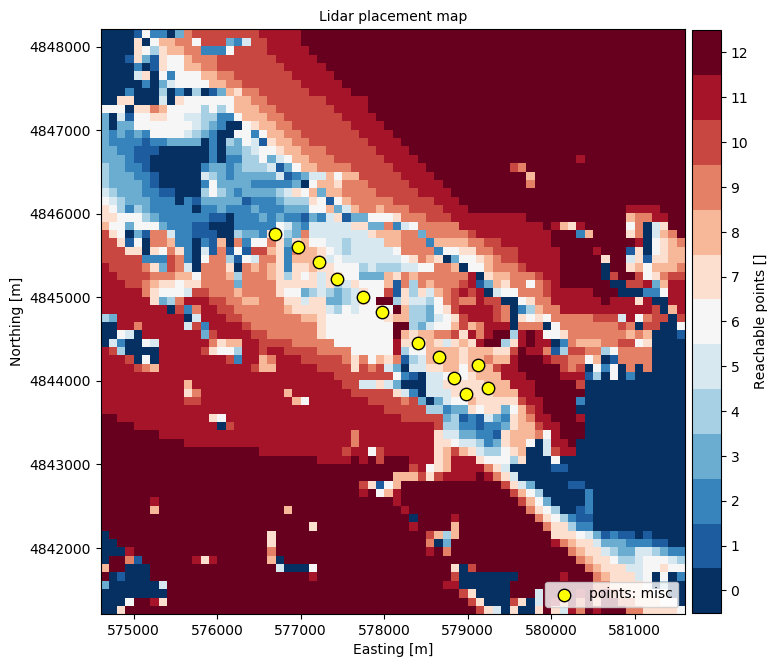

In [32]:
plot_layer(layout, layout.layer_selector('los_blockage'), 
                  title = 'Lidar placement map' , 
                  legend_label = 'Reachable points []')

In [31]:
    def plot_layer(self, layer, **kwargs):
        """
        Plots individual GIS layers.
    
        Parameters
        ----------
        layer : ndarray
            nD array containing data with `float` or `int` type 
            corresponding to a specific GIS layer.
        **kwargs : see below
    
        Keyword Arguments
        -----------------
        title : str
            The plot title.
        legend_label : str
            The legend label indicating what parameter is plotted.
        levels : ndarray
            Predetermined levels for the plotted parameter.
        save_plot : bool
            Indicating whether to save the plot as PDF.
        input_type : str
    
    
        Returns
        -------
        plot : matplotlib
    
        Examples
        --------
        >>> layout.plot_GIS_layer(layout.orography_layer, levels = np.array(range(0,510,10)), title = 'Orography', legend_label = 'Height asl [m]' , save_plot = True)
    
        """
        if layer is not None:
            if 'levels' in kwargs:
                levels = kwargs['levels']
            else:
                min_value = np.min(layer)
                max_value = np.max(layer)
                increment = abs(max_value - min_value)/20
                min_value = min_value
                
                levels = np.linspace(min_value, max_value, 20)
                boundaries = np.linspace(min_value - increment/2, max_value + increment/2, 21)          
        
            if len(layer.shape) > 2:
                layer = np.sum(layer, axis = 2)
                levels = np.array(range(-1,int(np.max(layer)) + 1, 1))
                boundaries = levels + 0.5
        
            fig, ax = plt.subplots(sharey = True, figsize=(800/self.MY_DPI, 800/self.MY_DPI), dpi=self.MY_DPI)
            cmap = plt.cm.RdBu_r
            cs = plt.pcolormesh(self.x, self.y, layer, cmap=cmap, alpha = 1)
        
        
            cbar = plt.colorbar(cs,orientation='vertical', ticks=levels, boundaries=boundaries,fraction=0.047, pad=0.01)
            if 'legend_label' in kwargs:
                cbar.set_label(kwargs['legend_label'], fontsize = self.FONT_SIZE)
                
            
            if 'points_type' in kwargs and kwargs['points_type'] in self.POINTS_TYPE:
                measurement_pts = self.measurement_type_selector(kwargs['points_type'])
            else:
                measurement_pts = self.measurement_type_selector(self.measurements_selector)        
        
            if measurement_pts is not None:
                for i, pts in enumerate(measurement_pts):
                    if i == 0:
                        ax.scatter(pts[0], pts[1], marker='o', 
                        facecolors='yellow', edgecolors='black', 
                        s=80,zorder=1500, label = 'points: ' + self.measurements_selector)                    
                    else:
                        ax.scatter(pts[0], pts[1], marker='o',
                        facecolors='yellow', edgecolors='black', 
                        s=80,zorder=1500)
        
            if self.reachable_points is not None:
                visible_points = measurement_pts[np.where(self.reachable_points>0)]
                for i in range(0,len(visible_points)):
                    if i == 0:
                        ax.scatter(visible_points[i][0], visible_points[i][1], 
                                marker='+', color='black', s=80,zorder=2000, label = "reachable")
                    else:
                        ax.scatter(visible_points[i][0], visible_points[i][1], 
                                marker='+', color='black', s=80,zorder=2000)
        
            plt.xlabel('Easting [m]', fontsize = self.FONT_SIZE)
            plt.ylabel('Northing [m]', fontsize = self.FONT_SIZE)
        
            if 'title' in kwargs:
                plt.title(kwargs['title'], fontsize = self.FONT_SIZE)
        
            ax.set_aspect(1.0)
        
            if len(self.lidar_dictionary) > 0:
                for i, lidar in enumerate(self.lidar_dictionary):
                    lidar_pos = self.lidar_dictionary[lidar]['position']
                    ax.scatter(lidar_pos[0], lidar_pos[1], 
                                marker='s', 
                                facecolors=self.COLOR_LIST[i], edgecolors='white',linewidth='2',
                                s=100, zorder=2000, label = 'lidar: ' + lidar)
        
            if self.lidar_pos_1 is not None or self.lidar_pos_2 is not None or measurement_pts is not None:
                ax.legend(loc='lower right', fontsize = self.FONT_SIZE)    
        
        
            
            plt.show()
        
            if 'title' in kwargs and 'save_plot' in kwargs and kwargs['save_plot']:
                    fig.savefig(self.OUTPUT_DATA_PATH + kwargs['title'] + '.pdf', bbox_inches='tight')
        else:
            print('Provided layer does not exist!')


In [ ]:
layout.layer_selector('restriction_zones').shape

In [ ]:
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.mask import mask
from shapely.geometry import box
import geopandas as gpd
from fiona.crs import from_epsg
import pycrs

In [ ]:
data = rasterio.open("/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/output/landcover_cropped_utm.tif")
data.meta

In [ ]:
data = rasterio.open(layout.LANDCOVER_DATA_PATH)
data.meta

In [ ]:
minx, miny = layout.mesh_corners_utm[0][0], layout.mesh_corners_utm[0][1]
maxx, maxy = layout.mesh_corners_utm[1][0], layout.mesh_corners_utm[1][1]

bbox = box(minx, miny, maxx, maxy)

In [ ]:
geo = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=from_epsg(layout.epsg_code))

In [ ]:
geo = geo.to_crs(crs=data.crs.data)

In [ ]:
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

In [ ]:
coords = getFeatures(geo)
print(coords)

In [ ]:
out_img, out_transform = mask(data,coords, crop=True)

In [ ]:
out_transform

In [ ]:
(layout.mesh_corners_utm[0] - layout.mesh_corners_utm[1]) / 100

In [ ]:
from PIL import Image

In [ ]:
im = Image.open('/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/output/landcover_cropped_utm.tif')

In [ ]:
im.show()

In [ ]:
imarray = np.array(im)

In [ ]:
imarray

In [ ]:
np.flip(imarray,axis=0)

In [ ]:
layout.landcover_layer

In [ ]:
epsg_code = int(data.crs.data['init'][5:])
print(epsg_code)

In [ ]:
out_meta.update({"driver": "GTiff",
                "height": out_img.shape[1],
                "width": out_img.shape[2],
                "transform": out_transform,
                "crs": pycrs.parse.from_epsg_code(epsg_code).to_proj4()})

In [ ]:
with rasterio.open('/Users/niva/Desktop/tmp/crop.tif', "w", **out_meta) as dest:
    dest.write(out_img)
    

In [ ]:
clipped = rasterio.open('/Users/niva/Desktop/tmp/crop.tif')
show(clipped, cmap='terrain')

In [ ]:
layout.epsg_code

In [ ]:
from rasterio.warp import calculate_default_transform, reproject, Resampling

dst_crs = 'EPSG:32633'

with rasterio.open('/Users/niva/Desktop/tmp/crop.tif') as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rasterio.open('/Users/niva/Desktop/tmp/crop_utm.tif', 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)


In [ ]:
layout.landcover_layer.shape

In [ ]:
layout.add_lidar_instance(position = np.array([580600 + 350,4845700 + 200,100]), lidar_id = 'koshava')
layout.update_lidar_instance(lidar_id = 'koshava', points_type = 'misc')

In [ ]:
layout.generate_second_lidar_layer(lidar_id = 'koshava')

In [ ]:
layout.plot_layer(layout.layer_selector('second_lidar_placement'), 
                  title = 'Lidar placement map' , 
                  legend_label = 'Reachable points []')

In [ ]:
layout.add_lidar_instance(position = np.array([580600 + 350,4845700 + 200,100]), lidar_id = 'koshava')
layout.add_lidar_instance(position = np.array([580800 - 1800,4845300 + 2500, 271]), lidar_id = 'whittle')
layout.add_lidar_instance(position = np.array([580600 - 4000,4845700 - 2000,100]), lidar_id = 'sirocco')
layout.add_lidar_instance(position = np.array([580600 - 4000,4845700 + 2000,100]), lidar_id = 'sterenn')

layout.update_lidar_instance(lidar_id = 'koshava', points_type = 'misc')
layout.update_lidar_instance(lidar_id = 'whittle', points_type = 'misc')

In [ ]:
layout.sync_trajectory(lidar_ids = ['whittle', 'koshava'])

In [ ]:
layout.export_measurement_scenario(lidar_id = 'koshava')

In [ ]:
layout.export_range_gate(lidar_id = 'koshava')